In [ ]:
#resource for data : https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

In [2]:
import os
os.getcwd()

'C:\\Users\\Hp\\Desktop\\case_study\\customer_value_analysis'

In [3]:
import numpy as np            # scintific computing with python
import pandas as pd           # data analysis tool kit    

%matplotlib inline           
import matplotlib.pyplot as plt  # for visualization

In [5]:
df = pd.read_csv('MCVA.csv')

In [6]:
df.shape

(9134, 24)

In [7]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# Analytics on Engaged customers

We are going to understand how different customers behaveand react for different marketting  strategies

## Over all engagement
The response field contains information about whether the cusomer responded to the marketing efforts. 

In [9]:
# get the total noof customer responded for marketing
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

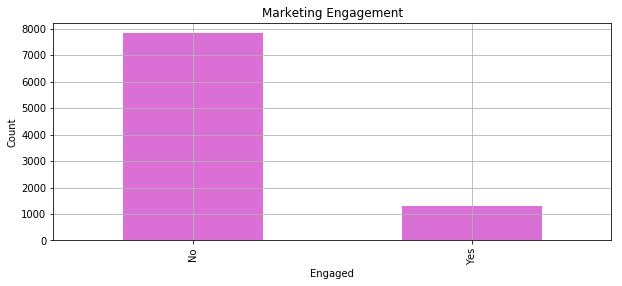

In [11]:
# visualzing the count
ax = df.groupby('Response').count()['Customer'].plot(
        kind = 'bar',color = 'orchid',grid = True,figsize=(10, 4),title = 'Marketing Engagement')
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()

In [12]:
# calculating the percentage of engaged and non-engaged customers
df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

From the about output we can see that only 14 percent of customers are reponding to the marketing

# 2.2 Engagement Rates by Offer type  
The Renewal offer type column in this Data frame contains the type of the renewal  offer presented to the customers.
we are going to look into what type of  offers worked best for the engaged customers.

In [13]:
# get the engagement rates per renewal offer
off_type_diff = df.loc[df['Response'] == 'Yes'].groupby(['Renew Offer Type']).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']

In [14]:
off_type_diff

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

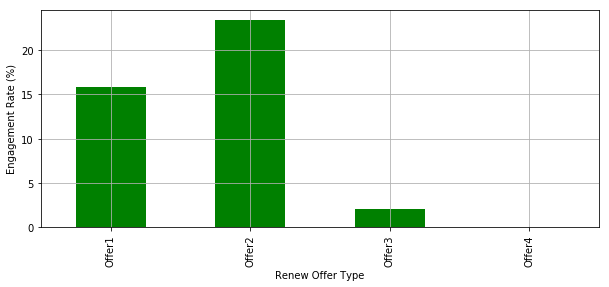

In [15]:
# visualize the bar plot
ax = (off_type_diff*100.0).plot(
    kind = 'bar',
    color = 'green',
    figsize = (10,4),
    grid = True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

In [16]:
# Offer type and Vehcle Class
"""We are going to understand how customer with different attributes responding differently to different marketing messages.
we start looking at the engagement rates by  each offer type and vehicle class"""

In [27]:
by_offer_by_type = df.loc[
                    df['Response'] == 'Yes'].groupby(['Renew Offer Type','Vehicle Class']).count()['Customer'] /df.groupby('Renew Offer Type').count()['Customer']

In [28]:
by_offer_by_type

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [29]:
# making the above code more readble by unstacking
by_offer_by_type = by_offer_by_type.unstack().fillna(0)

In [30]:
by_offer_by_type

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


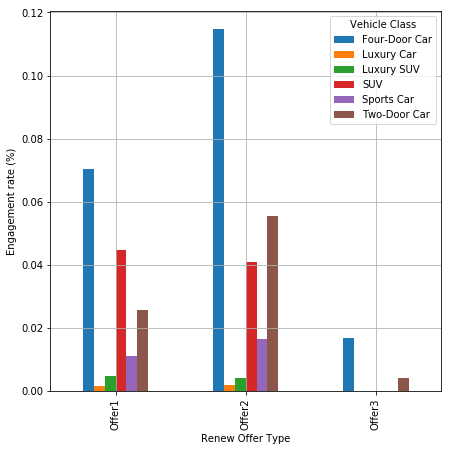

In [33]:
# visualize the data in the bar plot

ax = by_offer_by_type.plot(
        kind = 'bar',
        figsize = (7,7),
        grid = True)
ax.set_ylabel('Engagement rate (%)')
plt.show()

We already knew from the previous section “Engagement Rates by Offer Type” that Offer2
had the highest response rate among customers. Now we can add more insights by having broken
down the customer attributes with the category “Vehicle class”: we can notice that customers with
Four-Door Car resmpond more frequently for all offer types and that those with “Luxury SUV”
respond with a higher chance to Offer1 than to Offer2. If we have significantly difference in the
response rates among different customer rates, we can fine-tune who to target for different set
of offers

# Engagemnt Rates by sales channel

In [45]:
# we are going to see how engagement rates differ by different sales channels.
by_sales_by_channel = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']

In [46]:
by_sales_by_channel

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

Text(0,0.5,'Engagement Rate(%)')

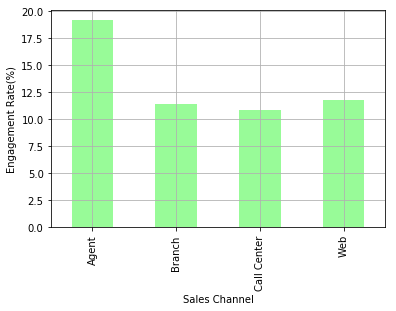

In [54]:
ax = (by_sales_by_channel*100.0).plot(kind = 'bar',grid = True,color = 'palegreen')
ax.set_ylabel('Engagement Rate(%)')

As we can notice, Agent works better in term of getting responses from the customers, and
then sales through Web works the second best. Let’s go ahead in breaking down this result deeper
with different customers’ attributes.

###  2.5  -Sales Channel & Vehicle Size

We are going to see whether customers with various vehicle sizes respond differently to different
sales channels.

In [68]:
by_sales_by_channel = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel','Vehicle Size']).count()['Customer'] / df.groupby('Sales Channel').count()['Customer']

In [69]:
by_sales_by_channel

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [70]:
# unstack the above values
by_sales_by_channel = by_sales_by_channel.unstack().fillna(0)

In [71]:
by_sales_by_channel

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


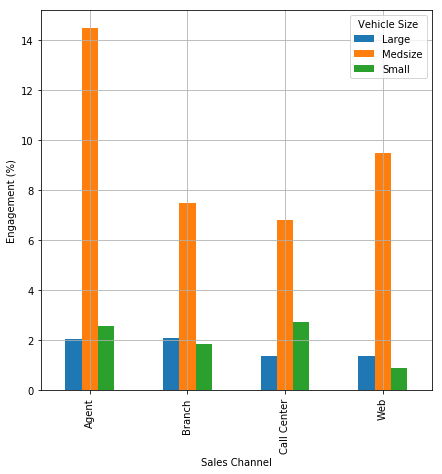

In [75]:
ax = (by_sales_by_channel*100).plot(kind = 'bar',grid = True,figsize = (7,7))
ax.set_ylabel('Engagement (%)')
plt.show()

### 2.6 - Engagement Rates by Months Since Policy Inception

In [87]:
by_mnth_since_pol = df.loc[df['Response'] == 'Yes'].groupby(by='Months Since Policy Inception')['Response'].count() / df.groupby(by = 'Months Since Policy Inception')['Response'].count()*100.0

In [90]:
by_mnth_since_pol.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82     0.000000
83    24.000000
84     6.000000
85    14.117647
86     0.000000
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.6

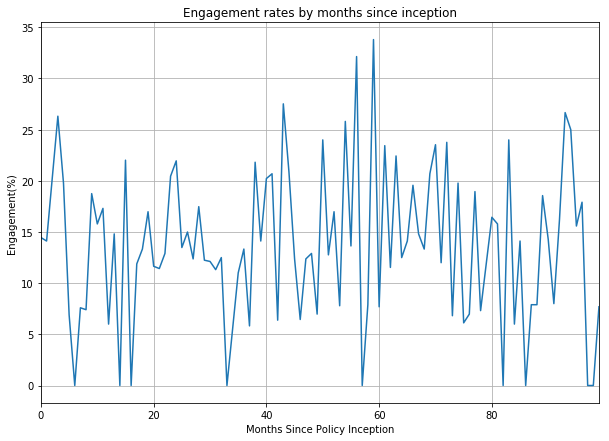

In [96]:
ax = by_mnth_since_pol.fillna(0).plot(grid = True,figsize = (10,7),title = 'Engagement rates by months since inception')
ax.set_ylabel('Engagement(%)')
plt.show()

## 3   3. Customer Segmentation by CLV & Months Since Policy Inception
We are going to segment our customer base by Customer Lifetime Value and Months Since Policy
Inception.

In [97]:
# Take a look at distribution 
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

For the previous output, we are going to define those customers with a CLV higher than the
median as high-CLV customers, and those with a CLV lower than the median as low-CLV customers.

In [98]:
# Customer segmentation
df['Cust_Segm'] = df['Customer Lifetime Value'].apply(lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low')

In [99]:
# same for Months since Policy inception
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [100]:
df['Polcy_segm'] = df['Months Since Policy Inception'].apply(lambda x :'High' if x > df['Months Since Policy Inception'].median() else 'Low')

In [103]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Cust_Segm', 'Polcy_segm'],
      dtype='object')

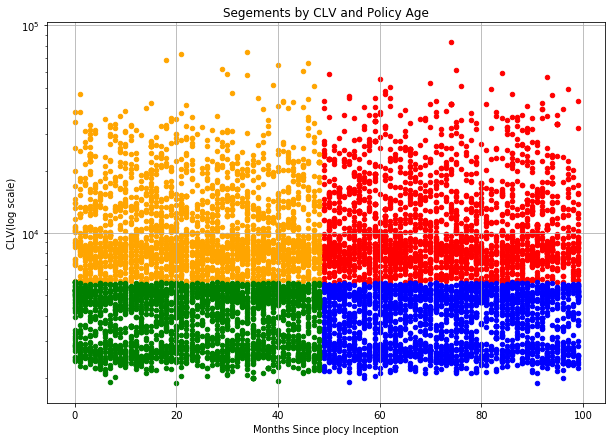

In [112]:
# visualize this segments
ax = df.loc[(df['Cust_Segm'] == 'High') & (df['Polcy_segm']=='High')
           ].plot.scatter(x = 'Months Since Policy Inception',y = 'Customer Lifetime Value',logy = True,color = 'red')

df.loc[(df['Cust_Segm'] == 'Low') & (df['Polcy_segm']=='High')
      ].plot.scatter(
        ax=ax,
        x = 'Months Since Policy Inception', y = 'Customer Lifetime Value',logy = True,color = 'blue')
df.loc[(df['Cust_Segm'] == 'High') & (df['Polcy_segm'] == 'Low')
      ].plot.scatter(
        ax=ax,
        x = 'Months Since Policy Inception', y = 'Customer Lifetime Value',
        logy = True,
        color = 'orange')
df.loc[(df['Cust_Segm'] == 'Low') & (df['Polcy_segm'] == 'Low')
      ].plot.scatter(
        ax=ax,
        x = 'Months Since Policy Inception', y = 'Customer Lifetime Value',
        logy = True,
        color = 'green',
        grid = True,
        figsize = (10,7))

ax.set_ylabel('CLV(log scale)')
ax.set_xlabel('Months Since plocy Inception')

ax.set_title('Segements by CLV and Policy Age')

plt.show()

